In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-04-19T13:56:09.714Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9728}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11013, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#to make the data extracted look pretty
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11013,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968705e+07,1.968705e+07,False,NaN,1,NaN,NaN,None,2024-04-19T13:54:00.000Z,64839.049626,5.053825e+10,14.5718,-0.357822,3.889812,-6.969196,2.112074,24.225305,55.937346,1.276490e+12,54.2158,1.361620e+12,None,2024-04-19T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 19:41:16.857084
1,1027,Ethereum,ETH,ethereum,8839,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200734e+08,1.200734e+08,True,NaN,2,NaN,NaN,None,2024-04-19T13:54:00.000Z,3096.400147,2.030398e+10,3.8265,-0.204377,2.047849,-10.378275,-7.309438,6.845288,25.429852,3.717952e+11,15.7911,3.717952e+11,None,2024-04-19T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 19:41:16.857084
2,825,Tether USDt,USDT,tether,83521,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.094696e+11,1.119410e+11,True,NaN,3,NaN,NaN,None,2024-04-19T13:54:00.000Z,1.000631,8.472271e+10,11.3354,-0.045443,0.037084,0.074462,0.085957,0.045638,0.125764,1.095386e+11,4.6524,1.120117e+11,None,2024-04-19T13:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-19 19:41:16.857084
3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495334e+08,1.495334e+08,False,NaN,4,NaN,NaN,None,2024-04-19T13:54:00.000Z,560.710132,1.396835e+09,-19.8340,-0.343495,3.209238,-8.195571,5.872862,58.988893,78.294817,8.384490e+10,3.5611,8.384490e+10,None,2024-04-19T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 19:41:16.857084
4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.468174e+08,5.742862e+08,True,NaN,5,NaN,NaN,None,2024-04-19T13:54:00.000Z,144.076947,5.985743e+09,22.0958,-0.504787,7.573942,-13.820881,-16.218059,27.271818,56.755509,6.437608e+10,2.7342,8.274140e+10,None,2024-04-19T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 19:41:16.857084
5,3408,USDC,USDC,usd-coin,18558,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.321541e+10,3.321541e+10,False,NaN,6,NaN,NaN,None,2024-04-19T13:54:00.000Z,0.999956,1.116340e+10,13.4329,-0.033311,0.005640,-0.014317,-0.020487,-0.003242,-0.006288,3.321394e+10,1.4107,3.321394e+10,None,2024-04-19T13:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-19 19:41:16.857084
6,52,XRP,XRP,xrp,1303,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.512914e+10,9.998767e+10,False,NaN,7,NaN,NaN,None,2024-04-19T13:55:00.000Z,0.500140,2.037827e+09,13.2711,-0.229850,1.209152,-15.848325,-15.845622,-10.452165,-9.019744,2.757231e+10,1.1711,5.001404e+10,None,2024-04-19T13:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 19:41:16.857084
7,11419,Toncoin,TON,toncoin,286,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.471118e+09,5.105430e+09,True,NaN,8,3.414167e+09,2.187494e+10,None,2024-04-19T13:54:00.000Z,6.407109,1.095986e+09,141.6362,-1.512426,4.386001,-9.548396,58.313678,184.610480,188.653420,2.223983e+10,0.9446,3.271105e+10,None,2024-04-19T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 19:41:16.857084
8,74,Dogecoin,DOGE,dogecoin,957,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange

In [21]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Ripple\Desktop\Data Science\Python\Projects\API.csv'):
     df.to_csv(r'C:\Users\Ripple\Desktop\Data Science\Python\Projects\API.csv',header='column_names')
    else:
     df.to_csv(r'C:\Users\Ripple\Desktop\Data Science\Python\Projects\API.csv',mode='a',header=False)

In [60]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner successful')
    sleep(30) #sleep for 30seconds
exit()

API runner successful
API runner successful
API runner successful
API runner successful
API runner successful
API runner successful
API runner successful
API runner successful


KeyboardInterrupt: 

In [63]:
df5=pd.read_csv(r"C:\Users\Ripple\Desktop\Data Science\Python\Projects\API.csv")

In [64]:
pd.options.display.float_format='{:,.2f}'.format
df5

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11013,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...","21,000,000.00","19,687,050.00","19,687,050.00",False,NaN,1,NaN,NaN,NaN,2024-04-19T14:32:00.000Z,"64,212.89","49,424,362,473.21",12.61,-0.91,0.79,-8.03,0.12,23.29,54.70,"1,264,162,308,515.33",54.41,"1,348,470,617,935.24",NaN,2024-04-19T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 20:18:04.285536
1,1,1027,Ethereum,ETH,ethereum,8839,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,"120,073,358.07","120,073,358.07",True,NaN,2,NaN,NaN,NaN,2024-04-19T14:31:00.000Z,"3,077.57","19,875,243,099.50",4.30,-0.42,-0.17,-11.26,-8.22,6.24,24.89,"369,534,139,178.16",15.80,"369,534,139,178.16",NaN,2024-04-19T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 20:18:04.285536
2,2,825,Tether USDt,USDT,tether,83521,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,"109,469,563,907.17","111,941,048,614.43",True,NaN,3,NaN,NaN,NaN,2024-04-19T14:31:00.000Z,1.00,"83,136,746,941.08",9.97,-0.02,-0.01,0.09,0.03,0.03,0.11,"109,515,971,579.89",4.68,"111,988,504,029.09",NaN,2024-04-19T14:31:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-19 20:18:04.285536
3,3,1839,BNB,BNB,bnb,2151,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,"149,533,416.10","149,533,416.10",False,NaN,4,NaN,NaN,NaN,2024-04-19T14:31:00.000Z,556.70,"1,339,807,585.84",-23.07,-0.51,0.61,-9.16,5.10,58.45,77.71,"83,245,458,439.11",3.56,"83,245,458,439.11",NaN,2024-04-19T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 20:18:04.285536
4,4,5426,Solana,SOL,solana,655,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,"446,817,373.14","574,286,193.04",True,NaN,5,NaN,NaN,NaN,2024-04-19T14:31:00.000Z,142.73,"5,829,712,032.31",17.94,-0.66,2.35,-15.02,-18.23,26.70,56.29,"63,772,469,782.52",2.73,"81,965,588,390.56",NaN,2024-04-19T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 20:18:04.285536
5,5,3408,USDC,USDC,usd-coin,18558,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,"33,215,410,512.25","33,215,410,512.25",False,NaN,6,NaN,NaN,NaN,2024-04-19T14:31:00.000Z,1.00,"11,004,796,087.41",12.28,0.01,-0.01,0.00,-0.01,-0.00,-0.01,"33,212,862,247.96",1.42,"33,212,862,247.96",NaN,2024-04-19T14:31:00.000Z,"1,027.00",Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-19 20:18:04.285536
6,6,52,XRP,XRP,xrp,1303,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...","100,000,000,000.00","55,129,144,019.00","99,987,674,482.00",False,NaN,7,NaN,NaN,NaN,2024-04-19T14:32:00.000Z,0.50,"2,016,166,641.58",13.09,-0.74,-1.01,-16.68,-16.96,-11.07,-9.67,"27,334,090,998.08",1.18,"49,581,925,285.58",NaN,2024-04-19T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 20:18:04.285536
7,7,11419,Toncoin,TON,toncoin,286,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,"3,471,118,107.22","5,105,430,125.99",True,NaN,8,"3,414,166,606.00","21,628,758,869.44",NaN,2024-04-19T14:31:00.000Z,6.34,"1,100,656,979.73",144.41,-0.04,2.59,-10.74,53.78,181.48,184.68,"21,989,546,853.55",0.94,"32,342,919,916.63",NaN,2024-04-19T14:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-19 20:18:04.285536
8,8,74,Dogecoin,DOGE,dogecoin,957,2013-12-15T

In [65]:
df6=df5.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df6

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.23,1.38,-7.11,1.25,23.99,55.36
Ethereum,-0.17,0.56,-10.53,-7.06,6.46,25.23
Tether USDt,0.00,0.01,0.10,0.06,0.05,0.12
BNB,-0.09,1.53,-8.46,7.40,58.49,78.24
Solana,0.30,4.98,-13.02,-15.13,28.73,60.10
USDC,0.01,0.01,0.01,0.00,0.01,-0.00
XRP,0.37,0.05,-15.67,-15.16,-10.17,-8.63
Toncoin,0.41,3.21,-9.46,53.14,182.00,186.56
Dogecoin,0.17,1.35,-20.80,14.78,75.29,92.59


In [67]:
df7=df6.stack()
df7

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.23
              quote.USD.percent_change_24h     1.38
              quote.USD.percent_change_7d     -7.11
              quote.USD.percent_change_30d     1.25
              quote.USD.percent_change_60d    23.99
              quote.USD.percent_change_90d    55.36
Ethereum      quote.USD.percent_change_1h     -0.17
              quote.USD.percent_change_24h     0.56
              quote.USD.percent_change_7d    -10.53
              quote.USD.percent_change_30d    -7.06
              quote.USD.percent_change_60d     6.46
              quote.USD.percent_change_90d    25.23
Tether USDt   quote.USD.percent_change_1h      0.00
              quote.USD.percent_change_24h     0.01
              quote.USD.percent_change_7d      0.10
              quote.USD.percent_change_30d     0.06
              quote.USD.percent_change_60d     0.05
              quote.USD.percent_change_90d     0.12
BNB           quote.U

In [68]:
df8=df7.to_frame(name='Values')
df8

Values
name                                             
Bitcoin      quote.USD.percent_change_1h    -0.23
             quote.USD.percent_change_24h    1.38
             quote.USD.percent_change_7d    -7.11
             quote.USD.percent_change_30d    1.25
             quote.USD.percent_change_60d   23.99
             quote.USD.percent_change_90d   55.36
Ethereum     quote.USD.percent_change_1h    -0.17
             quote.USD.percent_change_24h    0.56
             quote.USD.percent_change_7d   -10.53
             quote.USD.percent_change_30d   -7.06
             quote.USD.percent_change_60d    6.46
             quote.USD.percent_change_90d   25.23
Tether USDt  quote.USD.percent_change_1h     0.00
             quote.USD.percent_change_24h    0.01
             quote.USD.percent_change_7d     0.10
             quote.USD.percent_change_30d    0.06
             quote.USD.percent_change_60d    0.05
             quote.USD.percent_change_90d    0.12
BNB          quote.USD.percent_change_1h    -0.09
             quote.USD.percent_change_24h    1.53
             quote.USD.percent_change_7d    -8.46
             quote.USD.percent_change_30d    7.40
             quote.USD.percent_change_60d   58.49
             quote.USD.percent_change_90d   78.24
Solana       quote.USD.percent_change_1h     0.30
             quote.USD.percent_change_24h    4.98
             quote.USD.percent_change_7d   -13.02
             quote.USD.percent_change_30d  -15.13
             quote.USD.percent_change_60d   28.73
             quote.USD.percent_change_90d   60.10
USDC         quote.USD.percent_change_1h     0.01
             quote.USD.percent_change_24h    0.01
             quote.USD.percent_change_7d     0.01
             quote.USD.percent_change_30d    0.00
             quote.USD.percent_change_60d    0.01
             quote.USD.percent_change_90d   -0.00
XRP          quote.USD.percent_change_1h     0.37
             quote.USD.percent_change_24h    0.05
             quote.USD.percent_change_7d   -15.67
             quote.USD.percent_change_30d  -15.16
             quote.USD.percent_change_60d  -10.17
             quote.USD.percent_change_90d   -8.63
Toncoin      quote.USD.percent_change_1h     0.41
             quote.USD.percent_change_24h    3.21
             quote.USD.percent_change_7d    -9.46
             quote.USD.percent_change_30d   53.14
             quote.USD.percent_change_60d  182.00
             quote.USD.percent_change_90d  186.56
Dogecoin     quote.USD.percent_change_1h     0.17
             quote.USD.percent_change_24h    1.35
             quote.USD.percent_change_7d   -20.80
             quote.USD.percent_change_30d   14.78
             quote.USD.percent_change_60d   75.29
             quote.USD.percent_change_90d   92.59
Cardano      quote.USD.percent_change_1h    -0.22
             quote.USD.percent_change_24h    3.70
             quote.USD.percent_change_7d   -16.32
             quote.USD.percent_change_30d  -21.73
             quote.USD.percent_change_60d  -24.13
             quote.USD.percent_change_90d   -7.71
Shiba Inu    quote.USD.percent_change_1h    -0.19
             quote.USD.percent_change_24h    0.85
             quote.USD.percent_change_7d   -15.01
             quote.USD.percent_change_30d  -10.18
             quote.USD.percent_change_60d  134.46
             quote.USD.percent_change_90d  143.40
Avalanche    quote.USD.percent_change_1h    -0.38
             quote.USD.percent_change_24h    1.07
             quote.USD.percent_change_7d   -20.23
             quote.USD.percent_change_30d  -33.21
             quote.USD.percent_change_60d  -10.78
             quote.USD.percent_change_90d    8.70
Polkadot     quote.USD.percent_change_1h     0.11
             quote.USD.percent_change_24h    0.96
             quote.USD.percent_change_7d   -16.63
             quote.USD.percent_change_30d  -24.22
             quote.USD.percent_change_60d  -11.75
             quote.USD.percent_change_90d   -0.76
TRON         quote.USD.percent_change_1h   

In [69]:
df8.count()

Values    90
dtype: int64

In [70]:
index=pd.Index(range(90))
df9=df8.reset_index()
df9

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.23
1,Bitcoin,quote.USD.percent_change_24h,1.38
2,Bitcoin,quote.USD.percent_change_7d,-7.11
3,Bitcoin,quote.USD.percent_change_30d,1.25
4,Bitcoin,quote.USD.percent_change_60d,23.99
5,Bitcoin,quote.USD.percent_change_90d,55.36
6,Ethereum,quote.USD.percent_change_1h,-0.17
7,Ethereum,quote.USD.percent_change_24h,0.56
8,Ethereum,quote.USD.percent_change_7d,-10.53
9,Ethereum,quote.USD.percent_change_30d,-7.06


In [71]:
df9=df9.rename(columns={'level_1':'percent_change'})
df9

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.23
1,Bitcoin,quote.USD.percent_change_24h,1.38
2,Bitcoin,quote.USD.percent_change_7d,-7.11
3,Bitcoin,quote.USD.percent_change_30d,1.25
4,Bitcoin,quote.USD.percent_change_60d,23.99
5,Bitcoin,quote.USD.percent_change_90d,55.36
6,Ethereum,quote.USD.percent_change_1h,-0.17
7,Ethereum,quote.USD.percent_change_24h,0.56
8,Ethereum,quote.USD.percent_change_7d,-10.53
9,Ethereum,quote.USD.percent_change_30d,-7.06


In [72]:
df9['percent_change']=df9['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df9

,name,percent_change,Values
0,Bitcoin,1h,-0.23
1,Bitcoin,24h,1.38
2,Bitcoin,7d,-7.11
3,Bitcoin,30d,1.25
4,Bitcoin,60d,23.99
5,Bitcoin,90d,55.36
6,Ethereum,1h,-0.17
7,Ethereum,24h,0.56
8,Ethereum,7d,-10.53
9,Ethereum,30d,-7.06


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

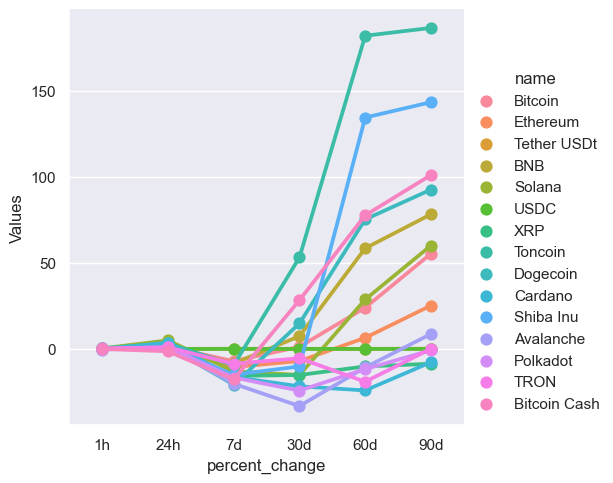

In [73]:
sns.catplot(x='percent_change',y='Values',hue='name',data=df9,kind='point')

In [74]:
df10=df5[['name','quote.USD.price','timestamp']]
df10=df10.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,"64,212.89",2024-04-19 20:18:04.285536
15,Bitcoin,"64,212.89",2024-04-19 20:18:35.438529
30,Bitcoin,"64,612.66",2024-04-19 20:32:03.551999
45,Bitcoin,"64,612.66",2024-04-19 20:32:34.737309
60,Bitcoin,"64,637.32",2024-04-19 21:34:38.987022
75,Bitcoin,"64,637.32",2024-04-19 21:35:10.189324
90,Bitcoin,"64,642.48",2024-04-19 21:35:41.220350
105,Bitcoin,"64,642.48",2024-04-19 21:36:12.179854
120,Bitcoin,"64,645.19",2024-04-19 21:36:43.313370
135,Bitcoin,"64,645.19",2024-04-19 21:37:14.456142


C:\Users\Ripple\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ripple\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ripple\AppData\Local\Temp\ipykernel_6220\74516893.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(),rotation=40)


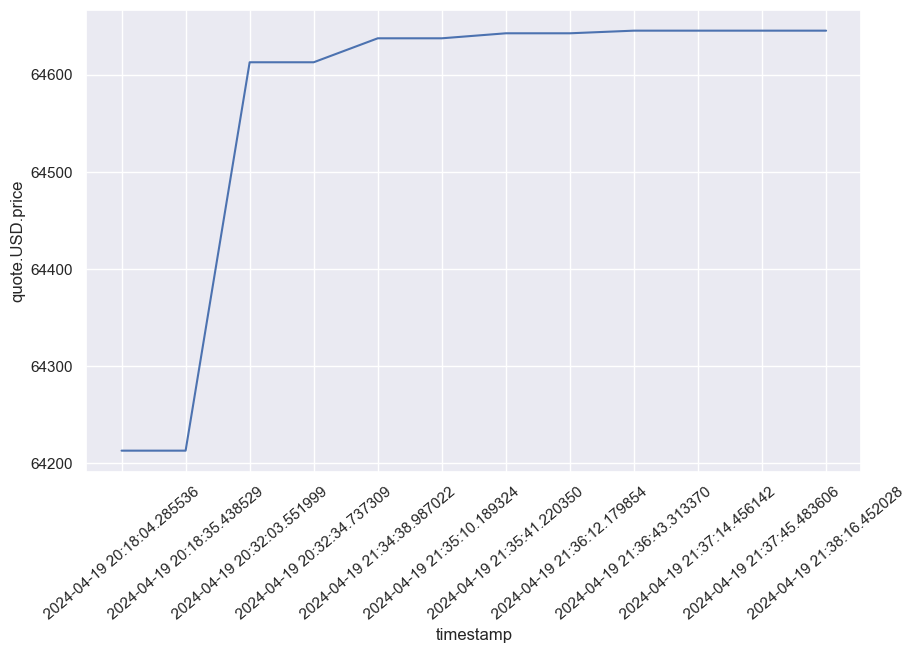

In [107]:
sns.set_theme(style='darkgrid')
axes=sns.lineplot(x='timestamp',y='quote.USD.price',data=df10)
axes.set_xticklabels(axes.get_xticklabels(),rotation=40)
plt.rcParams['figure.figsize']=(10,6)
plt.show()